In [ ]:
import pandas as pd

df = pd.read_csv('gold.csv')
print(df.head())

In [ ]:
print(df.isnull().sum())
df = df.dropna()

In [ ]:
df = df[['Date', 'United States(USD)']]
df.to_csv('new_gold.csv', index=False)
new_df = pd.read_csv('new_gold.csv')
print(new_df.head())

C:\Users\Lynn\AppData\Local\Temp\ipykernel_23296\4037608560.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_df['Date'] = pd.to_datetime(new_df['Date'])


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.43015, saving model to best_model.h5
8/8 - 3s - loss: 0.0240 - val_loss: 0.4301 - 3s/epoch - 412ms/step
Epoch 2/1000

Epoch 2: val_loss improved from 0.43015 to 0.37610, saving model to best_model.h5
8/8 - 0s - loss: 0.0187 - val_loss: 0.3761 - 72ms/epoch - 9ms/step
Epoch 3/1000

Epoch 3: val_loss improved from 0.37610 to 0.32273, saving model to best_model.h5
8/8 - 0s - loss: 0.0145 - val_loss: 0.3227 - 73ms/epoch - 9ms/step
Epoch 4/1000


c:\Users\Lynn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.32273 to 0.27521, saving model to best_model.h5
8/8 - 0s - loss: 0.0123 - val_loss: 0.2752 - 70ms/epoch - 9ms/step
Epoch 5/1000

Epoch 5: val_loss improved from 0.27521 to 0.23949, saving model to best_model.h5
8/8 - 0s - loss: 0.0118 - val_loss: 0.2395 - 74ms/epoch - 9ms/step
Epoch 6/1000

Epoch 6: val_loss improved from 0.23949 to 0.22548, saving model to best_model.h5
8/8 - 0s - loss: 0.0113 - val_loss: 0.2255 - 72ms/epoch - 9ms/step
Epoch 7/1000

Epoch 7: val_loss improved from 0.22548 to 0.21458, saving model to best_model.h5
8/8 - 0s - loss: 0.0103 - val_loss: 0.2146 - 73ms/epoch - 9ms/step
Epoch 8/1000

Epoch 8: val_loss improved from 0.21458 to 0.19660, saving model to best_model.h5
8/8 - 0s - loss: 0.0093 - val_loss: 0.1966 - 70ms/epoch - 9ms/step
Epoch 9/1000

Epoch 9: val_loss improved from 0.19660 to 0.17099, saving model to best_model.h5
8/8 - 0s - loss: 0.0083 - val_loss: 0.1710 - 70ms/epoch - 9ms/step
Epoch 10/1000

Epoch 10: val_loss i

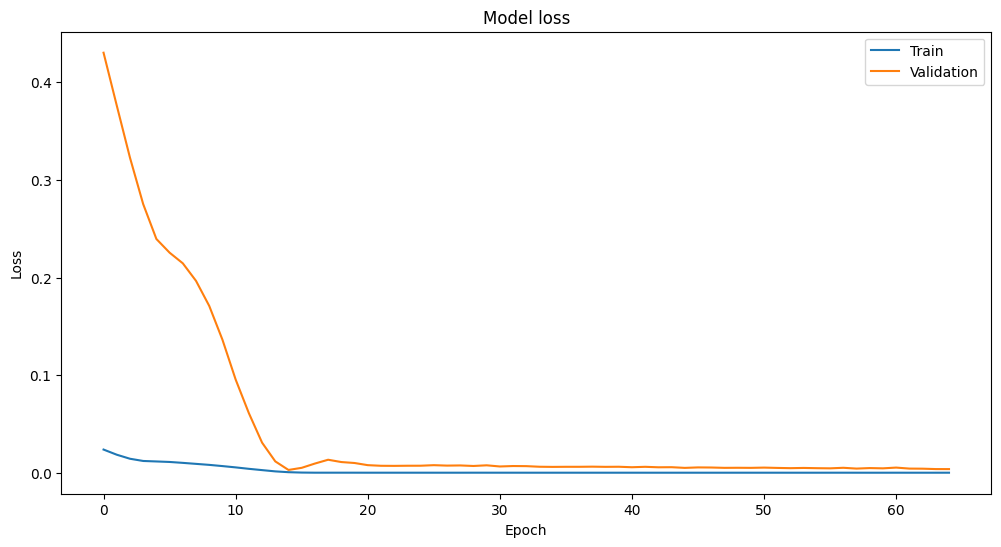

In [48]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
import matplotlib.pyplot as plt

new_df = pd.read_csv('new_gold.csv')

# Assuming new_df is your DataFrame and it's already preprocessed
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df['Date'] = new_df['Date'].apply(lambda x: x.toordinal())

new_df.set_index('Date', inplace=True)

# Normalize the Dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Create the input data and the target variable
X, y = [], []
for i in range(len(scaled_data)-1):
    X.append(scaled_data[i])
    y.append(scaled_data[i + 1])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the LSTM network
model.compile(loss='mean_squared_error', optimizer='adam')

# Create callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Fit the LSTM network with validation split
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=2, callbacks=[es, mc], validation_split=0.2)

model.save('gold_price.h5')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()